<a href="https://colab.research.google.com/github/Hanabi0127/Projects/blob/main/Prediction_of_Data_Science_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction

The dataset contains the details of practitioner's salaries whose working in the data science field from 2020 - 2025. The dataset is sourced from Kaggle website, and we will be using this dataset to do a full comprehensive data analysis & prediction on salary using the prediction models.

**Dataset:** https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/code

**Date:** 2025-04-03


In [ ]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation libraries
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score



In [ ]:
# Load data set
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [ ]:
# Check the list of columns
list(df.columns)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

The dataset has total of 11 columns, 4 numerical data and 7 categorical data.
In the Kaggle website, we can find more details about these attributes. Here's the attribute information that it's provided from the website.

#Attribute Information

*   **Work_year:** The year the salary was paid.
*   **Experience_level:** The experience level in the job during the year with the following possible values:
 *   *EN:* Entry-level / Junior
 *   *MI:* Mid-level / Intermediate
 *   *SE:* Senior-level / Expert
 *   *EX:* Executive-level / Director
*   **Employeement_type:** The experience level in the job during the year with the following possible values:
 *   *PT:* Part-time
 *   *FT:* Full-time
 *   *CT:* Contract
 *   *FL:* Freelance
*   **Job_title:** The role worked in during the year.
*   **Salary:** The total gross salary amount paid.
*   **Salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
*   **Salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
*   **Employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
*   **Remote_ratio:** The overall amount of work done remotely, possible values are as follows:
 *   *0:* No remote work (less than 20%)
 *   *50:* Partially remote/hybird
 *   *100:* Fully remote (more than 80%)
*   **Company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
*   **Company_size:** The average number of people that worked for the company during the year:
 *   *S:* less than 50 employees (small)
 *   *M:* 50 to 250 employees (medium)
 *   *L:* more than 250 employees (large)






























In [ ]:
# Data information
df.info()

# Missing value rate
for col in df.columns:
  MissingPercentage = df[col].isna().sum()/len(df)*100

  if MissingPercentage >= 0:
    print("\n {} null rate: {} %".format(col, round(MissingPercentage,2)))
    print("----------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB

 work_year null rate: 0.0 %
----------------------------------

 experience_level null rate: 0.0 %
----------------------------------

 employment_type null rate: 0.0 %
----------------------------------

 job_title 

The dataset has total of 88584 rows and has no null value. Let's check if there is present of duplicate rows in the dataset.

In [ ]:
# Checking duplicate.
print("The ratio of duplicate rows in the dataset is {}%.".format(round(df.duplicated().sum()/len(df)*100,2)))

The ratio of duplicate rows in the dataset is 50.05%.


In [ ]:
# Remove duplicate.
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44244 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           44244 non-null  int64 
 1   experience_level    44244 non-null  object
 2   employment_type     44244 non-null  object
 3   job_title           44244 non-null  object
 4   salary              44244 non-null  int64 
 5   salary_currency     44244 non-null  object
 6   salary_in_usd       44244 non-null  int64 
 7   employee_residence  44244 non-null  object
 8   remote_ratio        44244 non-null  int64 
 9   company_location    44244 non-null  object
 10  company_size        44244 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [ ]:
# 2nd round of check
print("The ratio of duplicate rows in the dataset is {}%.".format(round(df.duplicated().sum()/len(df)*100,2)))

The ratio of duplicate rows in the dataset is 0.0%.


Previously when we inspected the dataset, we had total of 88584 rows. After removal of duplicates, approximately 50% of our data got removed. Let's take a look at the statistical summary.

In [ ]:
# Statistical summary
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,44244.000000,4.424400e+04,44244.000000,44244.000000
mean,2024.065952,1.599579e+05,151313.435788,24.941235
std,0.713820,2.673229e+05,77343.097878,43.075374
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.620000e+04,96200.000000,0.000000
50%,2024.000000,1.400000e+05,139200.000000,0.000000
75%,2024.000000,1.920000e+05,190315.000000,50.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
# Group by experience level and find average salary.

df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending = True)

,salary_in_usd
experience_level,
EN,97585.962613
MI,137624.676442
SE,168474.791131
EX,199811.074671


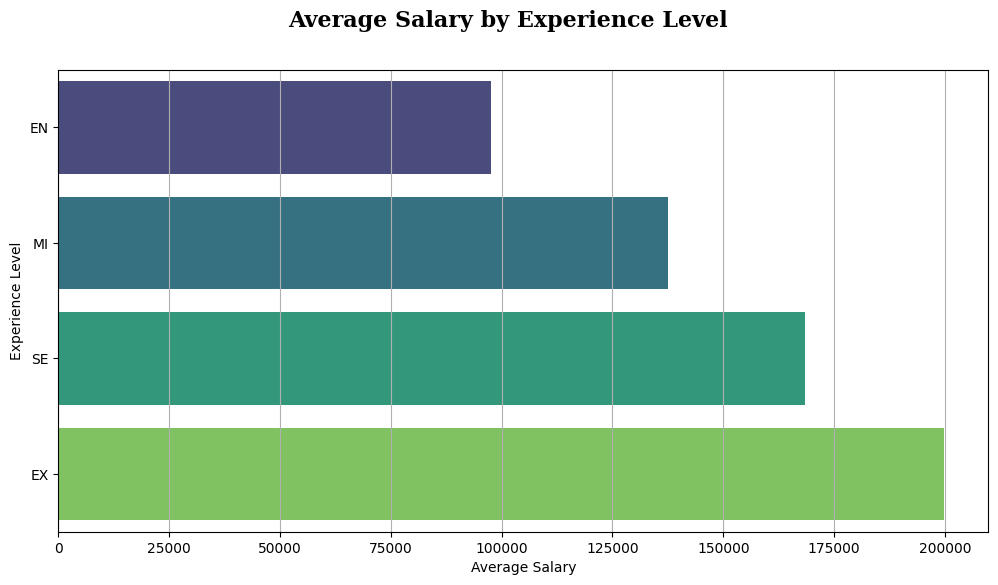

In [ ]:
# Bar chart of above outcome.
df_experience = df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending = True)

plt.figure(figsize=(12,6))
sns.barplot(x = df_experience.values, y = df_experience.index, hue = df_experience.index, palette="viridis")
plt.suptitle("Average Salary by Experience Level", fontsize=16, fontfamily="serif", fontweight="bold")
plt.xlabel("Average Salary")
plt.ylabel("Experience Level")
plt.grid(axis="x")
plt.show()

In [ ]:
# See the list of job title.
print("There are total of {} number of different job titles.".format(len(df["job_title"].unique())))
print("\n---------------------------------------------------------------------\n")

for title in df["job_title"].unique():
  if len(df[df["job_title"] == title]) == 1:
    print("{}: There is only {} person working as a {}.".format(title,len(df[df["job_title"] == title]),title))
  else:
    print("{}: There are {} people working as a {}.".format(title,len(df[df["job_title"] == title]),title))

There are total of 312 number of different job titles.

---------------------------------------------------------------------

Customer Success Manager: There is only 1 person working as a Customer Success Manager.
Engineer: There are 2515 people working as a Engineer.
Applied Scientist: There are 426 people working as a Applied Scientist.
Data Analyst: There are 4355 people working as a Data Analyst.
Software Development Engineer: There are 269 people working as a Software Development Engineer.
Research Scientist: There are 1027 people working as a Research Scientist.
Data Scientist: There are 5207 people working as a Data Scientist.
Platform Engineer: There are 218 people working as a Platform Engineer.
Computational Biologist: There are 32 people working as a Computational Biologist.
AI Data Scientist: There are 7 people working as a AI Data Scientist.
Admin & Data Analyst: There are 6 people working as a Admin & Data Analyst.
Cloud Engineer: There are 91 people working as a Cloud E

As we can see from the results above, there are a total of 312 distinct job titles. Let's focus on visualizing the top 5 most frequent job titles.

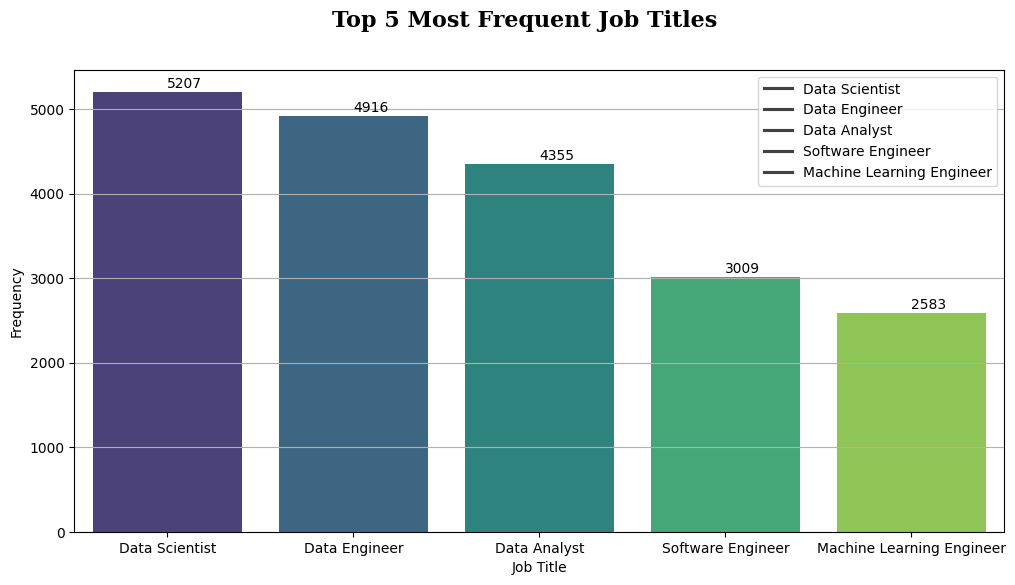

In [ ]:
# Top 10 most frequent job titles.
top_5_job_title = df["job_title"].value_counts().sort_values(ascending = False)[:5]

# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x = top_5_job_title.index, y = top_5_job_title.values, hue = top_5_job_title.index, palette="viridis")
plt.suptitle("Top 5 Most Frequent Job Titles", fontsize=16, fontfamily="serif", fontweight="bold")
plt.grid(axis="y")
plt.legend(top_5_job_title.index,loc="upper right")
plt.xlabel("Job Title")
plt.ylabel("Frequency")

# Label them.
for i, value in enumerate(top_5_job_title.values):
    plt.text(i, value + 100, str(value), va="center")

plt.show()



Here's top 5 most frequent job titles.


1.   Data Scientist (5207)
2.   Data Engineer (4916)
3.   Data Analyst (4355)
4.   Software Engineer (3009)
5.   Machine Learning Engineer (2583)

Now, let's take these top 5 roles and illustrate how their average salaries have shifted over time.





2025
The average salary of Data Scientist role in 2025 was $147533.22.
The average salary of Data Engineer role in 2025 was $145611.45.
The average salary of Data Analyst role in 2025 was $101063.93.
The average salary of Software Engineer role in 2025 was $186865.15.
The average salary of Machine Learning Engineer role in 2025 was $199707.96.
--------------------------------------------------------------------
2024
The average salary of Data Scientist role in 2024 was $155390.44.
The average salary of Data Engineer role in 2024 was $148611.4.
The average salary of Data Analyst role in 2024 was $105983.7.
The average salary of Software Engineer role in 2024 was $179302.22.
The average salary of Machine Learning Engineer role in 2024 was $187584.3.
--------------------------------------------------------------------
2022
The average salary of Data Scientist role in 2022 was $135335.52.
The average salary of Data Engineer role in 2022 was $138287.87.
The average salary of Data Analyst ro

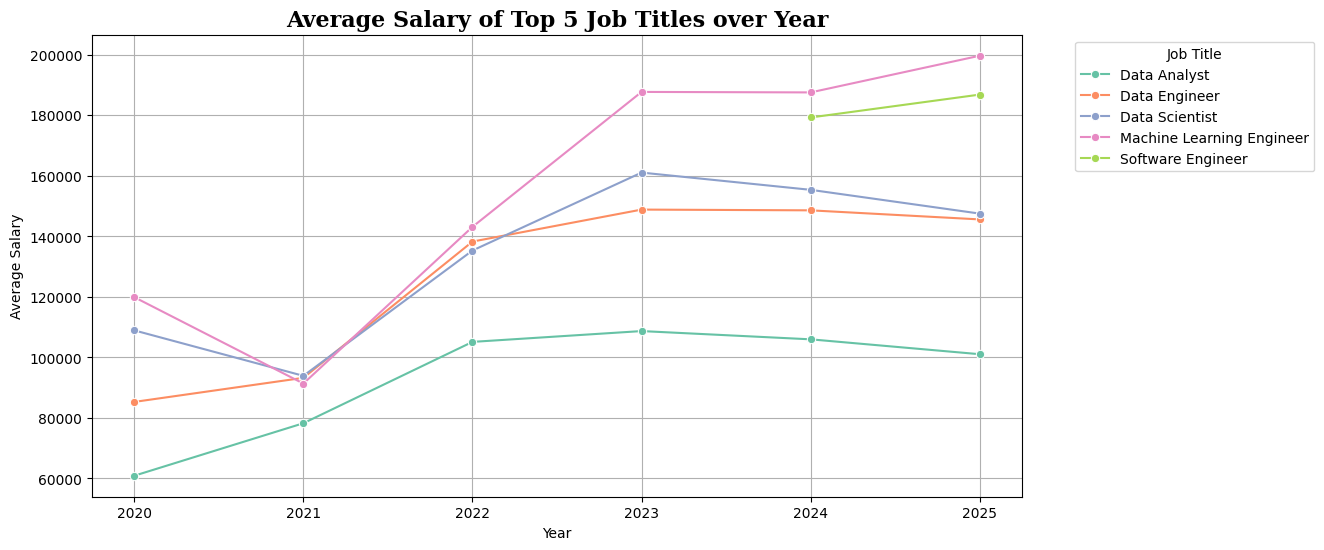

In [ ]:
# Average salaries of top 5 roles over year.

for year in df["work_year"].unique():
  print(year)
  for title in top_5_job_title.index:
    print("The average salary of {} role in {} was ${}.".format(title,year,round(df[(df["work_year"] == year) & (df["job_title"] == title)]["salary_in_usd"].mean(),2)))
  print("--------------------------------------------------------------------")

# Visualize the Average salary over time.

top_5_job = df[df["job_title"].isin(top_5_job_title.index)]
avg_salary_over_year = top_5_job.groupby(["job_title","work_year"])["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="work_year", y="salary_in_usd", data=avg_salary_over_year, hue="job_title", palette="Set2", marker="o")
plt.title("Average Salary of Top 5 Job Titles over Year", fontsize=16, fontfamily="serif", fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.grid()
plt.legend(title="Job Title",loc="upper left", bbox_to_anchor=(1.05,1))
plt.show()


Over the years, the average salary of the top 5 roles has significantly increased due to the many modern companies are demanding for data analyst and engineers to keep up with technological trends. We've noticed that Machine Learning Engineer consistently hold the highest average salary most of the time. As we trace down the tech trends in 2025, AI (Artificial intelligence) is the most advanced and innovative technology that dominates the entire industries across the board and we're now reached to the point where AI is being practically used by many IT companies to perform tasks that requires human intelligence such as problem solving, decision-making, forecasting, and other complex capabilities that only computer can efficiently handle. Machine Learning is the field of study that serves as the foundational discipline of AI and knowledge that requires to understand the key concepts and applications. Hence, the demand for AI practitioners has substantially increased over the past 5 years, leading to naturally increase in average salaries. Now, let's find out what are the top 5 occupation has the most highest average salary.

In [ ]:
# Top 5 highest average salary jobs
top_5_highest_job = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).nlargest(5)
top_5_highest_job

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Applied AI ML Lead,292500.000000
Head of Machine Learning,283573.545455
Director of Machine Learning,278815.625000


<ipython-input-15-3204c91bcaec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_5_highest_job.index, y = top_5_highest_job.values , palette="pastel")


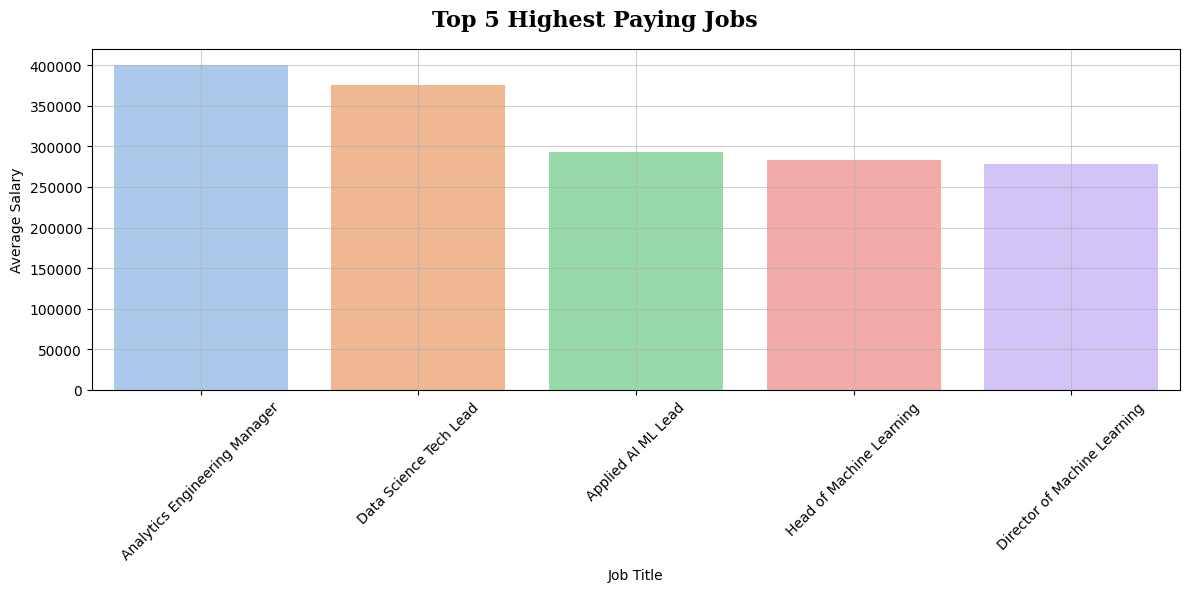

In [ ]:
# Barplot for top 5 highest paying jobs.

plt.figure(figsize=(12,6))
sns.barplot(x = top_5_highest_job.index, y = top_5_highest_job.values , palette="pastel")
plt.xticks(rotation=45)
plt.suptitle("Top 5 Highest Paying Jobs", fontsize=16, fontfamily="serif", fontweight="bold")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

Now, let's move onto a different topic. We would like to explore how many people in this industry are working remotely and which province has the highest remote working ratio. Before we dive into a deeper analysis, let's begin with some quick feature engineering to restructure our dataset.

In [ ]:
# Re-mapping our remote_ratio column.
map_value = {0:"No Remote",50:"Hybrid",100:"Fully Remote"}
df["remote_ratio"] = df["remote_ratio"].map(map_value)

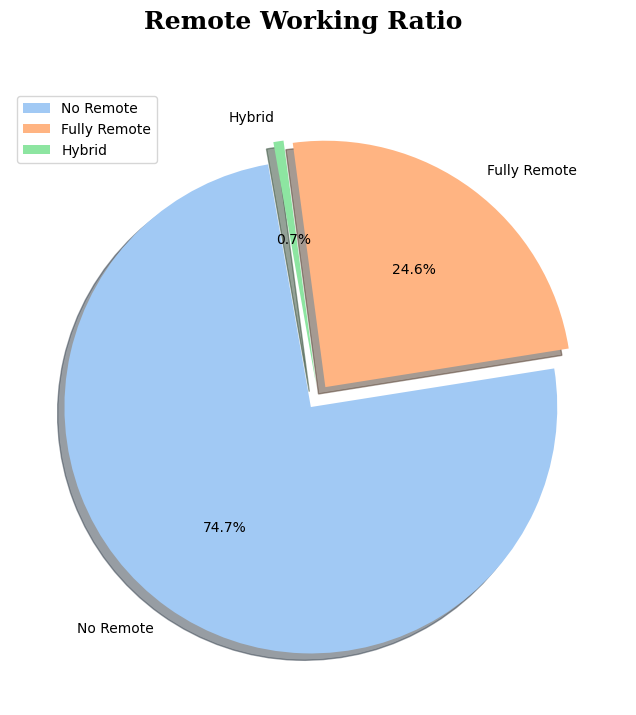

In [ ]:
# Pie Chart

ratio = df["remote_ratio"].value_counts()

plt.figure(figsize=(12,8))
plt.pie(x = ratio, labels = ratio.index,
        autopct="%0.1f%%", startangle = 100,
        explode = [0.05, 0.05, 0.05], shadow = True, colors= sns.color_palette("pastel"))
plt.suptitle("Remote Working Ratio", fontsize=18, fontfamily="serif", fontweight="bold")
plt.legend()
plt.show()


Approximately 75% of people in the dataset are working in the office, 25% of people are working remotely, and less than 1% of people are hybrid. Let's group them by each category and observe their location.

In [ ]:
# Group by remote ratio and employee's locations.
df.groupby("remote_ratio")["employee_residence"].value_counts()

remote_ratio  employee_residence
Fully Remote  US                    9199
              CA                     634
              GB                     265
              ES                      78
              IN                      73
                                    ... 
No Remote     PK                       1
              RS                       1
              RU                       1
              UZ                       1
              ZM                       1
Name: count, Length: 201, dtype: int64


Count

remote_ratio        Fully Remote  Hybrid  No Remote
employee_residence                                 
AU                          14.0     5.0      245.0
CA                         634.0    21.0     1805.0
DE                          46.0    27.0      157.0
ES                          78.0     8.0       50.0
FR                          40.0    28.0      118.0
GB                         265.0    29.0     1518.0
IN                          73.0    27.0       40.0
LT                           2.0     0.0      169.0
NL                          21.0    12.0      135.0
US                        9199.0    48.0    28141.0

Percentage

remote_ratio        Fully Remote  Hybrid  No Remote
employee_residence                                 
AU                          5.30    1.89      92.80
CA                         25.77    0.85      73.37
DE                         20.00   11.74      68.26
ES                         57.35    5.88      36.76
FR                         21.51   15.05   

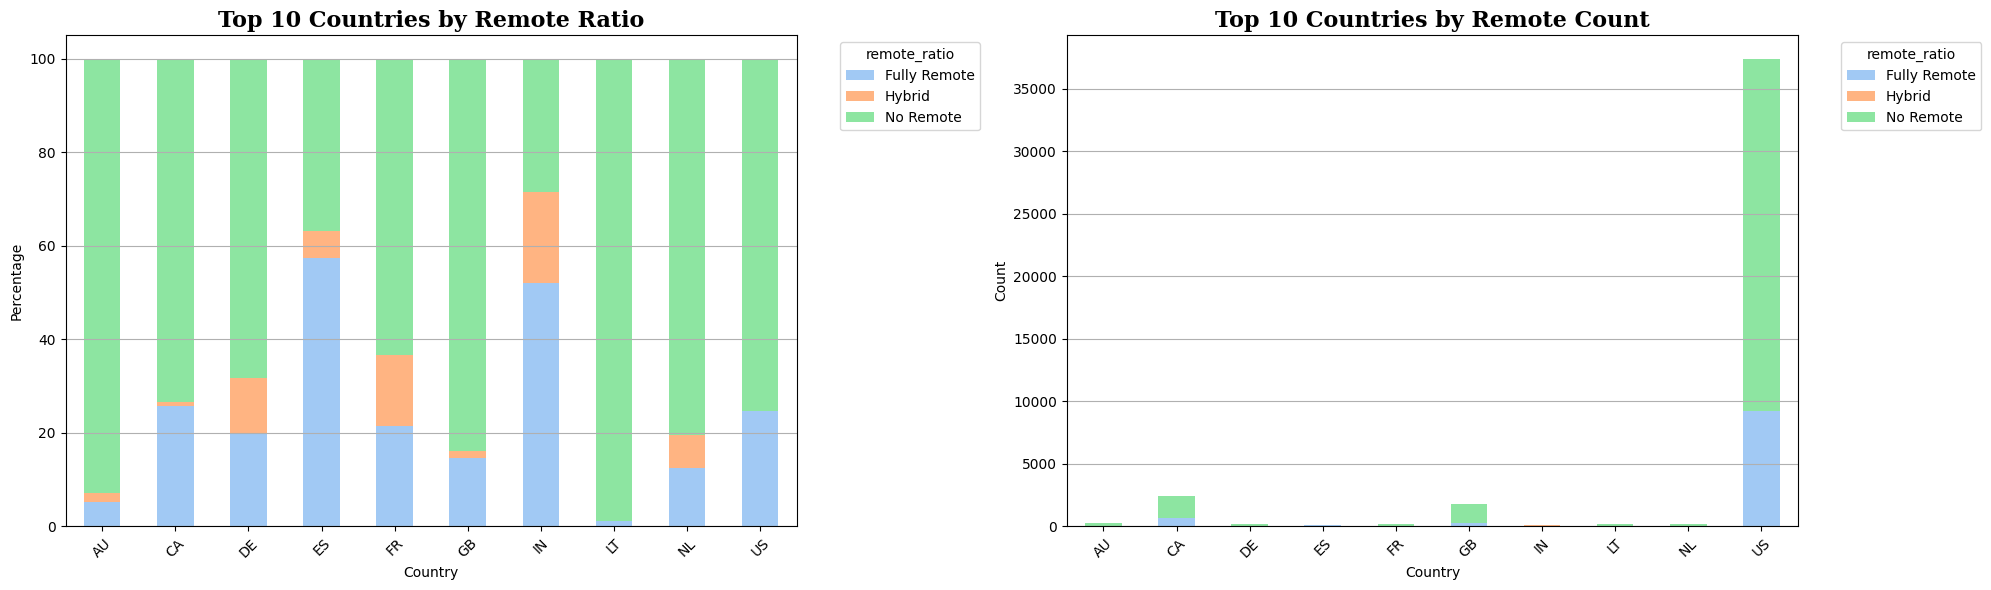

In [ ]:
# Stacked bar chart to visualize top 10 regions by remote ratio.
# Top 10 countries by remote ratio
top_10_country_index = df["employee_residence"].value_counts().nlargest(10).index
top_10_country = df[df["employee_residence"].isin(top_10_country_index)]
top_10_count = top_10_country.groupby("employee_residence")["remote_ratio"].value_counts().unstack().fillna(0)
print("\nCount\n")
print(top_10_count)

# Convert count to percentage
top_10_country_percentage = round(top_10_count.div(top_10_count.sum(axis=1), axis = 0) * 100,2)
print("\nPercentage\n")
print(top_10_country_percentage)

# Plot 2 stacked bar charts ratio vs count
fig, ax = plt.subplots(1, 2, figsize=(20,6))

# Plot 1: Stacked bar chart by ratio
top_10_country_percentage.plot(kind="bar", stacked= True, color = sns.color_palette("pastel"), ax=ax[0])
ax[0].set_title("Top 10 Countries by Remote Ratio", fontsize=16, fontfamily="serif", fontweight="bold")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Percentage")
ax[0].legend(title="remote_ratio", loc = "upper left", bbox_to_anchor=(1.05,1))
ax[0].grid(axis= "y")
ax[0].tick_params(axis = "x", rotation=45)

# Plot 2: Stacked bar chart by count
top_10_count.plot(kind="bar", stacked= True, color = sns.color_palette("pastel"), ax=ax[1])
ax[1].set_title("Top 10 Countries by Remote Count", fontsize=16, fontfamily="serif", fontweight="bold")
ax[1].set_xlabel("Country")
ax[1].set_ylabel("Count")
ax[1].legend(title="remote_ratio", loc = "upper left", bbox_to_anchor=(1.05,1))
ax[1].grid(axis= "y")
ax[1].tick_params(axis = "x", rotation=45)

plt.tight_layout()
plt.show()

Here's a quick summary of above graphs.

*   AU (Australia) and LT (Lithuania) are the top 2 countries that has more than 90% of people working in the office.
*   ES (Spain) and IN (India) are the top 2 countries that has more than 50% of people working remotely.
*   FR (France) and IN (India) are the top 2 countries that has more than 15% of people working hybrid.
*   The majority of people in the dataset are based in US. As a result, even though the US has lower remote ratio than the other countries, it still has the highest number of people working across all categories.

Let's sample US based employeee only and compare the difference of average salary between each work type.

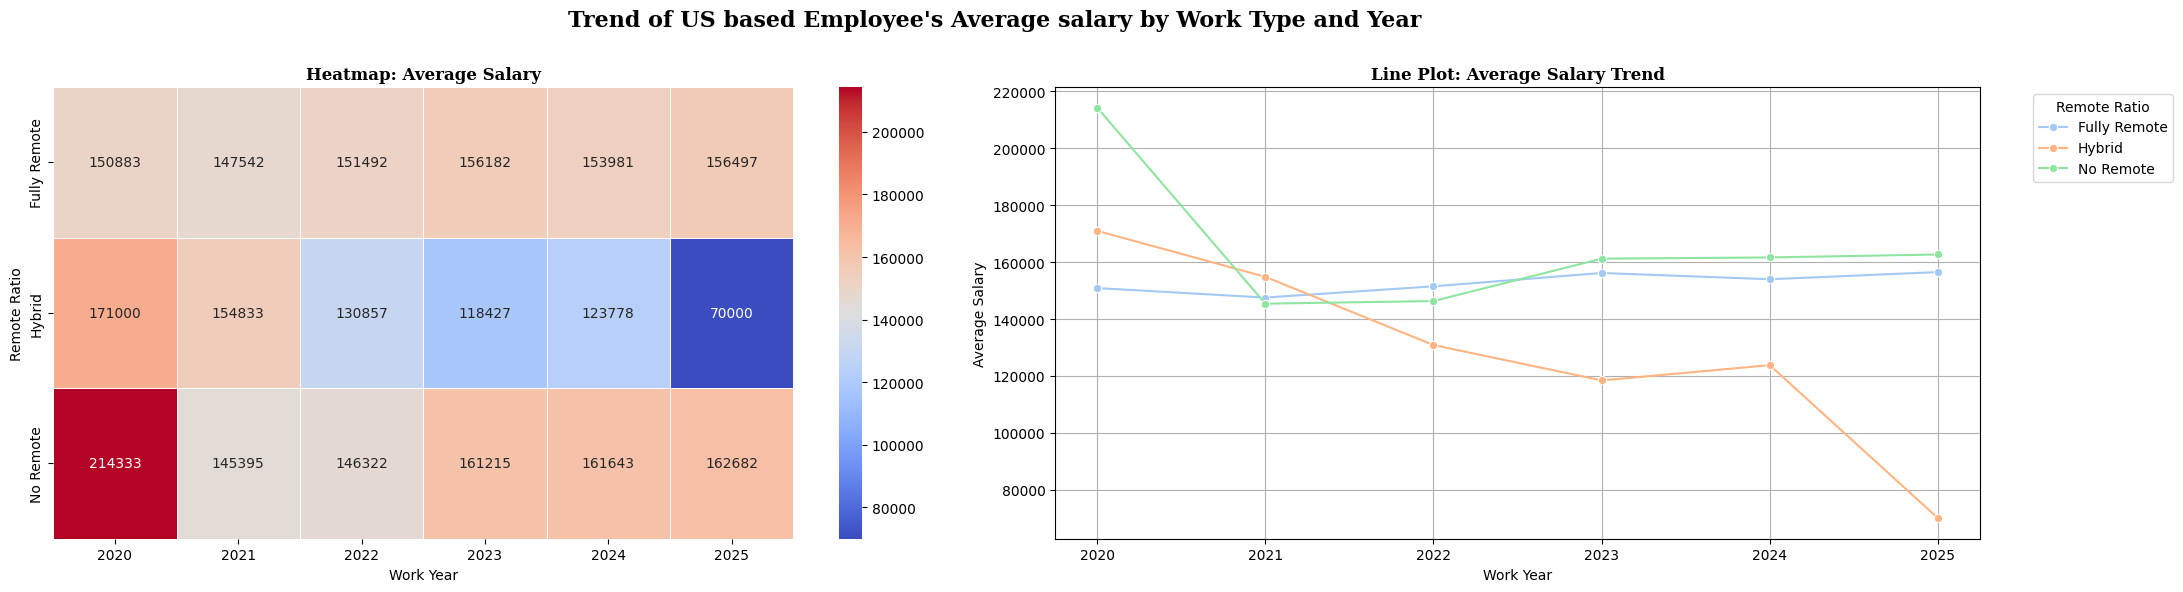

In [ ]:
# Sample US based employee.
US_based_employee = df[df["employee_residence"] == "US"]
heatmap = US_based_employee.groupby(["remote_ratio","work_year"])["salary_in_usd"].mean().unstack()
lineplot = US_based_employee.groupby(["remote_ratio","work_year"])["salary_in_usd"].mean().reset_index()

# Heatmap
fig , ax = plt.subplots(1,2,figsize=(20,6))

fig.suptitle("Trend of US based Employee's Average salary by Work Type and Year", fontsize=16, fontfamily="serif", fontweight="bold")

sns.heatmap(heatmap, annot=True, fmt="0.0f", linewidths=0.5, cmap="coolwarm", ax = ax[0])
ax[0].set_title("Heatmap: Average Salary", fontsize=12, fontfamily="serif", fontweight="bold")
ax[0].set_xlabel("Work Year")
ax[0].set_ylabel("Remote Ratio")

sns.lineplot(x="work_year", y="salary_in_usd", data = lineplot, hue="remote_ratio", palette="pastel", marker="o", ax=ax[1])
ax[1].set_title("Line Plot: Average Salary Trend", fontsize=12, fontfamily="serif", fontweight="bold")
ax[1].set_xlabel("Work Year")
ax[1].set_ylabel("Average Salary")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.grid(True)
plt.legend(title="Remote Ratio", loc = "upper left", bbox_to_anchor=(1.05,1))
plt.show()


As shown in the graphs above, "No Remote" is slightly higher than the other, but there is no significant difference in the average salary for 2025 between the "No Remote" and "Fully Remote" categories.  The "Hybrid" category is excluded from the comparison due to lack of data to calculate average salary. Let's draw a boxplot to compare the distribution of US based employee's salary by experience level.

<ipython-input-21-77b08e051a5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "experience_level", y = "salary_in_usd", data = US_based_employee, palette="pastel", width=0.5)


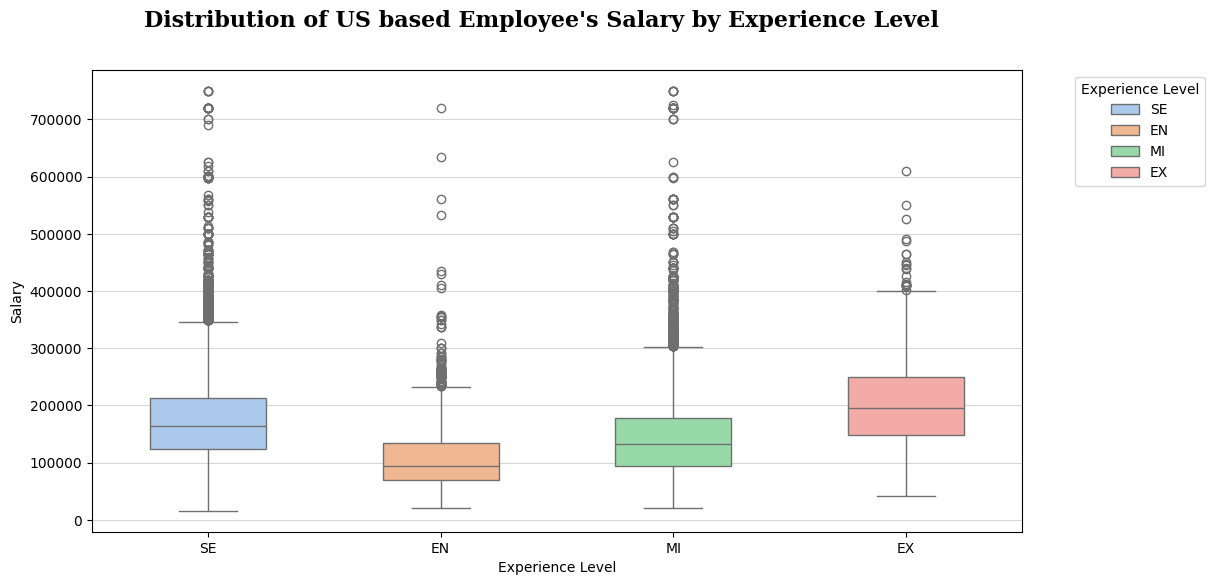

In [ ]:
# Boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x = "experience_level", y = "salary_in_usd", data = US_based_employee, palette="pastel", width=0.5)
plt.suptitle("Distribution of US based Employee's Salary by Experience Level", fontsize=16, fontfamily="serif", fontweight="bold")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.grid(axis="y", alpha=0.5)
plt.legend(US_based_employee["experience_level"].unique(), loc = "upper left", bbox_to_anchor=(1.05,1), title="Experience Level")
plt.show()

The boxplot shown above represent the distribution of US based employee's salary by experience level. We can clearly see the differences of value concentrated area between each experience level. As expected, the EN (Entry Level) has the lowest salary range and mainly distributed near the bottm of the graph,then as experience level increases, the distribution of salaries rises accordingly. We can presume that there is a positive correlation between experience level and salary which is a true statement most of the time.

How can we visually prove that some columns in the dataset has meaningful relationship between them? Let's plot a correlation matrix and observe.

In [ ]:
# Find all categorical columns.

categorical_col = df.select_dtypes(include=["object"]).columns

print("List of Categorical columns \n")
for i, col in enumerate(categorical_col):
  print("{}. {}".format(i+1, col))

List of Categorical columns 

1. experience_level
2. employment_type
3. job_title
4. salary_currency
5. employee_residence
6. remote_ratio
7. company_location
8. company_size


In [ ]:
# Apply LabelEncoding to convert them into numerical labels.

Corr_Matrix_df = df.copy()

for col in categorical_col:
  Encoder = LabelEncoder()
  Corr_Matrix_df[col] = Encoder.fit_transform(Corr_Matrix_df[col])

In [ ]:
# Compare dataset before vs after applied LabelEncoding

print(df[categorical_col].head())
print("\n--------------------------------------------------------------------\n")
print(Corr_Matrix_df[categorical_col].head())


  experience_level employment_type                 job_title salary_currency  \
0               MI              FT  Customer Success Manager             EUR   
1               SE              FT                  Engineer             USD   
2               SE              FT                  Engineer             USD   
3               SE              FT         Applied Scientist             USD   
4               SE              FT         Applied Scientist             USD   

  employee_residence remote_ratio company_location company_size  
0                 NL       Hybrid               NL            L  
1                 US    No Remote               US            M  
2                 US    No Remote               US            M  
3                 US    No Remote               US            M  
4                 US    No Remote               US            M  

--------------------------------------------------------------------

   experience_level  employment_type  job_title  sal

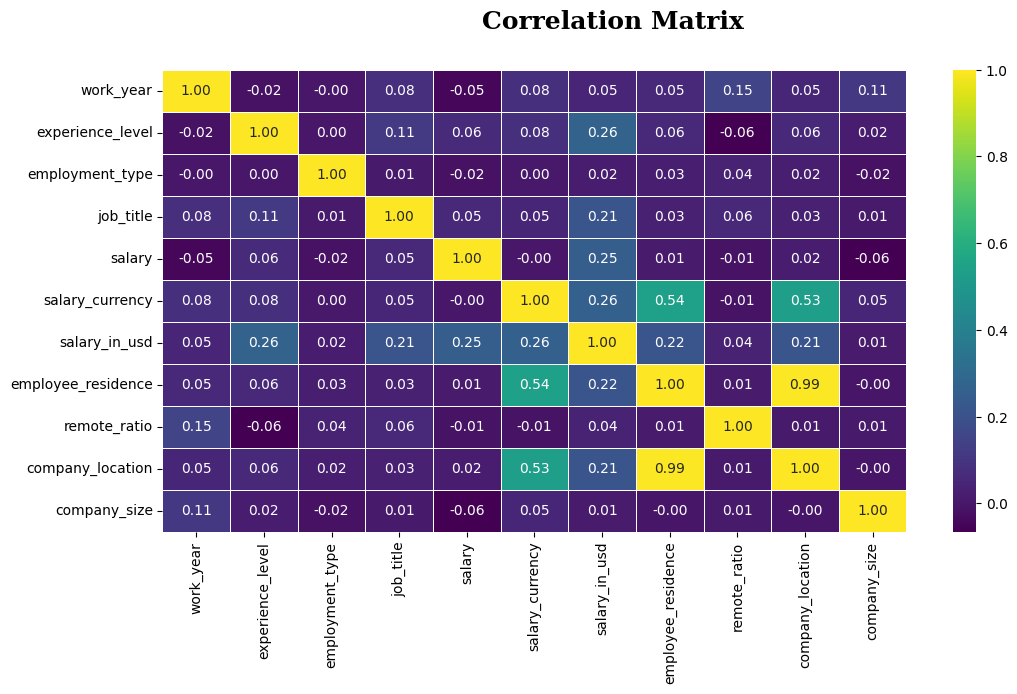

In [ ]:
# Plot a Correlation Matrix

Corr_Matrix = Corr_Matrix_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(Corr_Matrix, annot=True, fmt=".2f", linewidths=0.5, cmap="viridis")
plt.suptitle("Correlation Matrix", fontsize=18, fontfamily="serif", fontweight="bold")
plt.show()

In the correlation matrix above, we observed a strong positive correlation between *employee_residence* and *company_location*. Additionally, both *employee_residence* and *company_location* show a moderate positive corelation with *salary_currency*.

Previously, we've mentioned that *salary_in_usd* and *experience_level* could potentially have a postivie correlation. As you can see in the graph, they have positive correlation, but not very significant (*0.2 ~ 0.39 is considered as weak correlation.*). The remaining correlations are close to zero and are not significant enough to interpret.

# Introducing 5 Prediction models#

After our pre-analysis, we can start building prediction models and compare their performances to see which models has the highest accuracy.
We will be using 5 different prediction models to predict salary and compare each model's performance by it's accuracy. Here's the list of 5 methods that we will be using.

1.   DecisionTreeRegression
2.   RandomForestRegressor
3.   GradientBoostingRegressor
4.   XGBRegressor
5.   LGBMRegressor

Before we build our models, let's perform a feature scaling to transform our dataset. It is a mandatory procedure before we pass down our data to train the models. It will standardize the features by removing the mean and scaling to unit variance.

What we're planning to do is that using the attributes in the dataset to train our model, then we'll predict the salary with our test set and see how close we were to the actual salary. We will split 20% of our data as a test set and will use 80% to train our models. For some models, we need to specify the number of estimators in the models. In general, increasing the number of estimators tends to improve the model's performance. We will use 3 different value of estimators to test out how the model has been improved as we increase the number of estimators.

In [ ]:
# Split explanatory variables and a response variable. In this case, our response variable is Salary.

x = Corr_Matrix_df.drop("salary_in_usd", axis = 1)
y = Corr_Matrix_df["salary_in_usd"]

# Standardize our explanatory variables.

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Split our dataset

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
# Model 1: DecisionTreeRegrssion

model_1 = DecisionTreeRegressor(random_state = 42)
model_1.fit(x_train, y_train)

train_pred_1 = model_1.predict(x_train)
test_pred_1 = model_1.predict(x_test)

train_mse_1 = MSE(y_train, train_pred_1)
test_mse_1 = MSE(y_test, test_pred_1)
accuracy_1 = model_1.score(x_test, y_test)

print(f"Training MSE: {round(train_mse_1,2)}")
print(f"Test MSE: {round(test_mse_1,2)}")
print(f"Accuracy: {round(accuracy_1 * 100, 2)}%")

Training MSE: 0.0
Test MSE: 129204775.11
Accuracy: 97.86%


In [ ]:
# Model 2: RandomForestRegressor

n_estimator = [100, 200, 300]

for i, n in enumerate(n_estimator):
  model_2 = RandomForestRegressor(n_estimators = n_estimator[i], random_state = 42)
  model_2.fit(x_train, y_train)

  train_pred_2 = model_2.predict(x_train)
  test_pred_2 = model_2.predict(x_test)

  train_mse_2 = MSE(y_train, train_pred_2)
  test_mse_2 = MSE(y_test, test_pred_2)
  accuracy_2 = model_2.score(x_test, y_test)

  print(f"n_estimator: {n} \n")
  print(f"Training MSE: {round(train_mse_2,2)}")
  print(f"Test MSE: {round(test_mse_2,2)}")
  print(f"Accuracy: {round(accuracy_2 * 100, 2)}%")
  print("\n-----------------------------------------------\n")

n_estimator: 100 

Training MSE: 13122565.42
Test MSE: 128778469.66
Accuracy: 97.86%

-----------------------------------------------

n_estimator: 200 

Training MSE: 13443027.67
Test MSE: 128903016.85
Accuracy: 97.86%

-----------------------------------------------

n_estimator: 300 

Training MSE: 13725373.82
Test MSE: 125422982.44
Accuracy: 97.92%

-----------------------------------------------



In [ ]:
# Model 3: GradientBoostingRegressor

for i, n in enumerate(n_estimator):
  model_3 = GradientBoostingRegressor(n_estimators = n_estimator[i], random_state = 42)
  model_3.fit(x_train, y_train)

  train_pred_3 = model_3.predict(x_train)
  test_pred_3 = model_3.predict(x_test)

  train_mse_3 = MSE(y_train, train_pred_3)
  test_mse_3 = MSE(y_test, test_pred_3)
  accuracy_3 = model_3.score(x_test, y_test)

  print(f"n_estimator: {n} \n")
  print(f"Training MSE: {round(train_mse_3,2)}")
  print(f"Test MSE: {round(test_mse_3,2)}")
  print(f"Accuracy: {round(accuracy_3 * 100, 2)}%")
  print("\n-----------------------------------------------\n")

n_estimator: 100 

Training MSE: 17430593.78
Test MSE: 49694668.37
Accuracy: 99.18%

-----------------------------------------------

n_estimator: 200 

Training MSE: 4123488.14
Test MSE: 32713163.48
Accuracy: 99.46%

-----------------------------------------------

n_estimator: 300 

Training MSE: 2392037.98
Test MSE: 30527909.43
Accuracy: 99.49%

-----------------------------------------------



In [ ]:
# Model 4: XGBRegressor

for i, n in enumerate(n_estimator):
  model_4 = XGBRegressor(objective = "reg:squarederror", n_estimators = n_estimator[i], random_state = 42)
  model_4.fit(x_train, y_train)

  train_pred_4 = model_4.predict(x_train)
  test_pred_4 = model_4.predict(x_test)

  train_mse_4 = MSE(y_train, train_pred_4)
  test_mse_4 = MSE(y_test, test_pred_4)
  accuracy_4 = model_4.score(x_test, y_test)

  print(f"n_estimator: {n} \n")
  print(f"Training MSE: {round(train_mse_4,2)}")
  print(f"Test MSE: {round(test_mse_4,2)}")
  print(f"Accuracy: {round(accuracy_4 * 100, 2)}%")
  print("\n-----------------------------------------------\n")

n_estimator: 100 

Training MSE: 5900273.0
Test MSE: 38368540.0
Accuracy: 99.36%

-----------------------------------------------

n_estimator: 200 

Training MSE: 4879160.0
Test MSE: 39635292.0
Accuracy: 99.34%

-----------------------------------------------

n_estimator: 300 

Training MSE: 4579050.0
Test MSE: 40312964.0
Accuracy: 99.33%

-----------------------------------------------



In [ ]:
# Model 5: LGBMRegressor

for i, n in enumerate(n_estimator):
  model_5 = LGBMRegressor(n_estimators = n_estimator[i], random_state = 42)
  model_5.fit(x_train, y_train)

  train_pred_5 = model_5.predict(x_train)
  test_pred_5 = model_5.predict(x_test)

  train_mse_5 = MSE(y_train, train_pred_5)
  test_mse_5 = MSE(y_test, test_pred_5)
  accuracy_5 = model_5.score(x_test, y_test)

  print(f"n_estimator: {n} \n")
  print(f"Training MSE: {round(train_mse_5,2)}")
  print(f"Test MSE: {round(test_mse_5,2)}")
  print(f"Accuracy: {round(accuracy_5 * 100, 2)}%")
  print("\n-----------------------------------------------\n")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 35395, number of used features: 10
[LightGBM] [Info] Start training from score 151365.645487


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


n_estimator: 100 

Training MSE: 25988737.32
Test MSE: 68119849.74
Accuracy: 98.87%

-----------------------------------------------

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 35395, number of used features: 10
[LightGBM] [Info] Start training from score 151365.645487


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


n_estimator: 200 

Training MSE: 18355275.06
Test MSE: 62931646.8
Accuracy: 98.96%

-----------------------------------------------

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 35395, number of used features: 10
[LightGBM] [Info] Start training from score 151365.645487


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


n_estimator: 300 

Training MSE: 14773875.09
Test MSE: 63031943.36
Accuracy: 98.95%

-----------------------------------------------



In [ ]:
# Model Comparison
pd.options.display.float_format = '{:.4f}'.format

result = {"Models": ["Model " + str(x) for x in range(1,6)],
          "Accuracy" : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5],
          "Training MSE" : [train_mse_1, train_mse_2, train_mse_3, train_mse_4, train_mse_5],
          "Test MSE:" : [test_mse_1, test_mse_2, test_mse_3, test_mse_4, test_mse_5],
          "Algorithm": ["DecisionTreeRegression", "RandomForestRegression","GradientBoostingRegression","XGBRegression","LGBMRegression"]}

result_df = pd.DataFrame(result).set_index("Models")
result_df["Accuracy"] = result_df["Accuracy"] * 100
result_df["Rank"] = result_df["Accuracy"].rank(ascending = False).astype(int)
result_df.sort_values(by = "Accuracy", ascending = False)

,Accuracy,Training MSE,Test MSE:,Algorithm,Rank
Models,,,,,
Model 3,99.4934,2392037.9793,30527909.4299,GradientBoostingRegression,1
Model 4,99.3310,4579050.0000,40312964.0000,XGBRegression,2
Model 5,98.9540,14773875.0935,63031943.3638,LGBMRegression,3
Model 2,97.9186,13725373.8245,125422982.4375,RandomForestRegression,4
Model 1,97.8559,0.0000,129204775.1146,DecisionTreeRegression,5


In overall, the *Model 3* has the best performance among the five models. By using **GradientBoostingRegression**, we obtained **99.4934%** of accuracy with the lowest MSE in both the training and test sets. Although *Model 1* showed the lowest training MSE, we did not consider it meaningfully since DecisionTreeRegressor tends to memorize the entire training set, leading to potential *overfitting*. The result may vary depending on the model set-up such as increase the number of estimators, collecting more data, or apply more advanced data preprocessing techniques, or there may be better performing algorithm than these five methods.

Now, let's end our analysis by testing a sample data to compare the actual salary vs predicted salary, and see how far off the prediction.

In [ ]:
# Sample from our test set.

np.random.seed(42)
sample_index = np.random.randint(0,len(x_test),)

sample_y = y_test.reset_index(drop=True)[sample_index]
sample_x = x_test[sample_index]

# Predict sample y with using sample x.

sample_y_pred = model_3.predict(sample_x.reshape(1,-1))

print(f"Actual Salary: {round(sample_y,2)}")
print(f"Predicted Salary: {round(sample_y_pred[0],2)}")
print(f"Discrepancy between Actual vs Prediction: ${round(sample_y - sample_y_pred[0],2)} , Off by {round((sample_y - sample_y_pred[0])/sample_y_pred[0],4)*100}%")

Actual Salary: 78228
Predicted Salary: 77808.83
Discrepancy between Actual vs Prediction: $419.17 , Off by 0.54%
